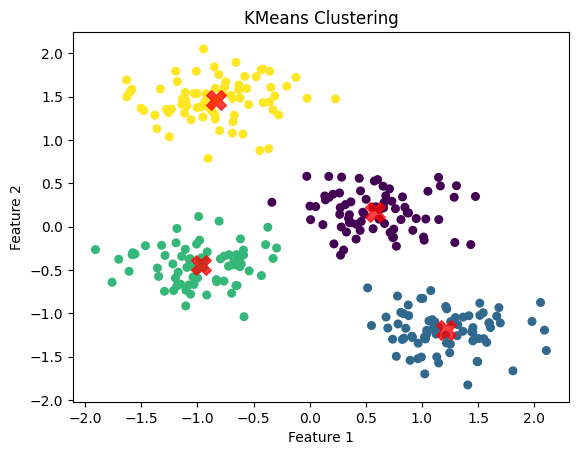

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels_ = None
    
    def fit(self,X):
        n_samples, n_features = X.shape

        # Step 1: Randomly initialize centroids
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        # Centriod Shape = (n_clusters, n_features)
        # X[random_indices] gives us the initial centroids
        self.centroids = X[random_indices]
        
        for i in range(self.max_iter):
            
            # Step 1: Calculate distances from each point to each centroid
            # X[:, np.newaxis] adds a new axis to X, making it shape (n_samples, 1, n_features)
            # self.centroids is shape (n_clusters, n_features)
            # np.newaxis allows us to broadcast the subtraction operation
            # Shape of X[:, np.newaxis] - self.centroids is (n_samples, n_clusters, n_features)
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

            # Step 2: Assign labels based on closest centroid
            #distance.shape = (n_samples, self.n_clusters)
            self.labels_ = np.argmin(distances, axis=1)
            
            # Step 2: Update centroids
            # Create a new array to hold the updated centroids 
            new_centroids = np.zeros((self.n_clusters, n_features))  

            # Iterate over each cluster and calculate the mean of the points assigned to it
            for k in range(self.n_clusters):  
                cluster_points = X[self.labels_ == k]  
                if len(cluster_points) > 0:  
                    new_centroids[k] = cluster_points.mean(axis=0)  
                else:  
                    # If a cluster has no points, keep the old centroid  
                    new_centroids[k] = self.centroids[k]  

            # Check for convergence (if centroids do not change significantly)  
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:  
                break  

            self.centroids = new_centroids
    
    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    


# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

k_means = KMeans(n_clusters=4, max_iter=300, tol=1e-4)
k_means.fit(X)
y_pred = k_means.predict(X)

#Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, cmap='viridis')
centers = k_means.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [5]:
#Silhouette Score
silhouette_avg = silhouette_score(X, y_pred)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.66
